_________

# Desafio Final

_________

### Importando a Biblioteca Pandas

In [91]:
import pandas as pd

### Importando os Dados dos Experimentos pelo Github

In [92]:
url_dados = 'https://github.com/Mathvivas/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'

dados_experimentos = pd.read_csv(url_dados, compression='zip')

In [93]:
dados_experimentos.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


# Tratamento dos Dados

- Foi dito nas aulas da Imersão, que a coluna **"droga"** ainda não é exatamente uma droga, e sim um **composto**. Os experimentos foram realizados para que houvesse o descobrimento de uma possível droga.

## Renomeando a Coluna "droga"

In [94]:
renomear = {'droga' : 'composto'}
dados_experimentos = dados_experimentos.rename(columns=renomear)

## Removendo os Hífens das Colunas

- Os hífens nas colunas podem gerar erros em certos códigos, pois podem ser "confundidos" com o símbolo de subtração.

In [95]:
i = 0
for i in range(len(dados_experimentos.columns)):
  dados_experimentos.rename(columns = {dados_experimentos.columns[i] : dados_experimentos.columns[i].replace('-', '')}, inplace=True)

In [96]:
dados_experimentos.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


# Explorando os Dados

In [97]:
print(f'Os dados de experimentos possuem {dados_experimentos.shape[0]} linhas e {dados_experimentos.shape[1]} colunas')

Os dados de experimentos possuem 23814 linhas e 877 colunas


#### Tratamento

In [98]:
print(f'Meios de Tratamento: {dados_experimentos["tratamento"].unique()} \n')

print(f'Quantidade de Cada Tratamento: \n{dados_experimentos["tratamento"].value_counts()} \n')

print(f'Proporção de Cada Tratamento: \n{dados_experimentos["tratamento"].value_counts(normalize=True)}')

Meios de Tratamento: ['com_droga' 'com_controle'] 

Quantidade de Cada Tratamento: 
com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64 

Proporção de Cada Tratamento: 
com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64


- **com droga**: Aplicação de algum tipo de droga (composto) na amostra;
- **com controle**: Técnica estatística onde isolamos as outras variáveis e observamos somente a de interesse. *Exemplo*: Temos dois grupos iguais em ambientes nos quais somente uma variável é diferente (como por exemplo, o ar), sendo assim, pode-se observar a mudança com base somente nessa variável diferente;

- Pode-se observar uma quantidade muito superior de tratamentos com droga.
_____________

#### Doses

In [99]:
print(f'Doses: {dados_experimentos["dose"].unique()} \n')

print(f'Quantidade de Cada Dose: \n{dados_experimentos["dose"].value_counts()} \n')

print(f'Proporção de Cada Dose: \n{dados_experimentos["dose"].value_counts(normalize=True)}')

Doses: ['D1' 'D2'] 

Quantidade de Cada Dose: 
D1    12147
D2    11667
Name: dose, dtype: int64 

Proporção de Cada Dose: 
D1    0.510078
D2    0.489922
Name: dose, dtype: float64


- Não há como afirmar exatamente o que essas duas doses significam;
- Uma possível definição pode ser: uma dose é maior do que a outra;

- Pode-se observar um equilíbrio na quantidade de doses.
______________________

#### Tempo

In [100]:
print(f'Tempo em horas: {dados_experimentos["tempo"].unique()} \n')

print(f'Quantidade de Cada Tempo: \n{dados_experimentos["tempo"].value_counts()}')

Tempo em horas: [24 72 48] 

Quantidade de Cada Tempo: 
48    8250
72    7792
24    7772
Name: tempo, dtype: int64


- O intervalo em que foi administrada a dose do composto;
- Pode-se observar que o tempo de 48 horas foi o mais utilizado
__________________

#### Compostos

In [101]:
print(f'Compostos Utilizados: {dados_experimentos["composto"].unique()}')

Compostos Utilizados: ['b68db1d53' 'df89a8e5a' '18bb41b2c' ... '573c787a2' 'b2fe3eca7'
 'dd4a96d16']


- Há uma quantidade grande de compostos utilizados
__________________

In [102]:
print(f'Quantidade de Compostos Utilizados: {dados_experimentos["composto"].nunique()}')

Quantidade de Compostos Utilizados: 3289


#### Dados Nulos

In [103]:
print(f'Quantidade de Dados Nulos: \n{dados_experimentos.isna().sum()}')

Quantidade de Dados Nulos: 
id            0
tratamento    0
tempo         0
dose          0
composto      0
             ..
c95           0
c96           0
c97           0
c98           0
c99           0
Length: 877, dtype: int64


- Aparentemente não existem dados nulos no DataFrame
____________________

In [104]:
dados_experimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


- Os dados possuem 872 colunas de ponto flutuante (decimais), uma coluna de inteiros e 4 colunas de texto
__________________________

## Análise dos 6 Compostos mais Utilizados

In [105]:
top6_compostos = dados_experimentos['composto'].value_counts().index[0:6] # 7 valores, porém o último não é selecionado

In [106]:
dados_experimentos.query('composto in @top6_compostos')

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,-6.7470,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.2850,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.0630,-0.8282,-3.5000,0.9206,-5.1450,9.8040,-2.6840,-2.4390,-0.1427,...,-10.0000,-9.5910,-10.0000,-10.0000,-8.5110,-10.0000,-10.0000,-10.0000,-10.0000,-8.8870,-10.0000,-10.0000,-10.0000,-10.0000,-4.9020,-9.9840,-5.5520,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.7960,-8.1770,-9.8990,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,0.7535,0.5971,1.6350,-0.3146,0.4984,-1.1890,0.3772,-0.8196,0.1083,-2.0350,0.4135,0.7586,-0.4024,-0.0449,0.3335,0.2358,0.7919,-0.8775,0.4232,1.8460,-2.0940,0.1438,-0.6604,0.7243,0.0338,-0.0182,-0.2022,0.8827,

- @top6_compostos para informar à query que a variável já foi definida fora da função.

### Importando Bibliotecas de Gráficos

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

### Setando o Tamanho das Figuras do Seaborn

In [108]:
sns.set(rc = {'figure.figsize' : (12, 10)})

### Análise do Gráfico

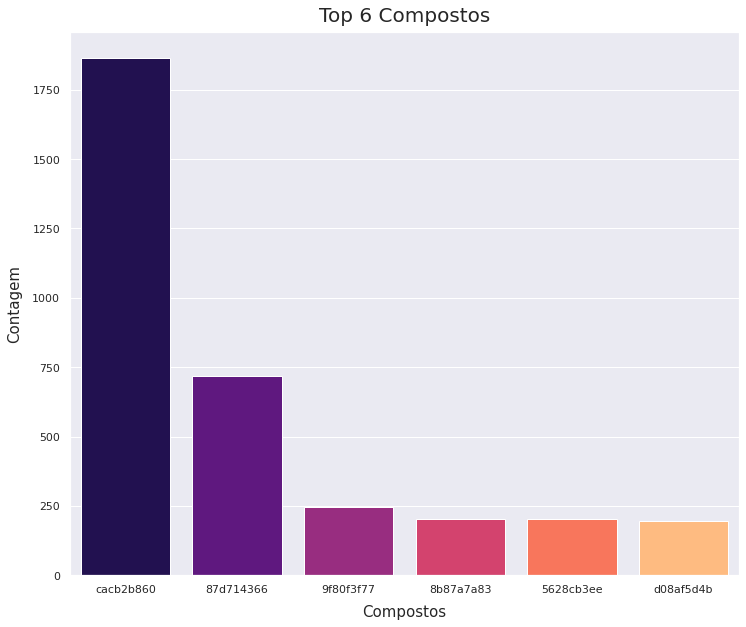

In [109]:
ax = sns.countplot(x = 'composto', data = dados_experimentos.query('composto in @top6_compostos'),
                   order = top6_compostos, palette = 'magma', saturation = 1)
ax.set_title('Top 6 Compostos', fontsize = 20, pad=10)
ax.set_xlabel('Compostos', fontsize = 15, labelpad=10)
ax.set_ylabel('Contagem', fontsize = 15, labelpad=10)
ax = ax

- Há um enorme uso do composto cacb2b860 em relação aos outros utilizados;
- A partir do terceiro composto, pode-se observar uma proximidade no uso;
- **Será que devido ao seu grande uso, o composto cacb2b860 pode ser considerado um bom candidato a remédio?**

## Análise do Composto cacb2b860

In [110]:
print('Quantidade de Usos do Composto cacb2b860: {}'.format(len(dados_experimentos.query('composto == "cacb2b860"'))))

Quantidade de Usos do Composto cacb2b860: 1866


In [111]:
dados_experimentos.query('composto == "cacb2b860"')['tratamento'].unique()

array(['com_controle'], dtype=object)

- Todos os experimentos de cacb2b860 foram feitos com controle, ou seja, cacb2b860 **não é um candidato para remédio**, pois os experimentos feitos por controle não usam composto;
- Todos os experimentos de controle foram com cacb2b860;
- Foi dito em aula que os experimentos com controle não devem ativar nada, portanto, **cacb2b860 não pode ser considerado candidato a remédio**, o que responde a pergunta acima.
__________________________

# Análise dos Genes

- Sabe-se que os g's da tabela são conhecidos como 'Genes' e que os números desses, representam a expressão causada pelo composto ou exposição.

- De acordo com o [brasilescola](https://brasilescola.uol.com.br/biologia/genes.htm#:~:text=O%20gene%20nada%20mais%20%C3%A9,a%20unidade%20fundamental%20da%20hereditariedade.) : O gene nada mais é do que uma sequência específica do DNA que contém as instruções necessárias para a síntese de uma proteína ou molécula de RNA.

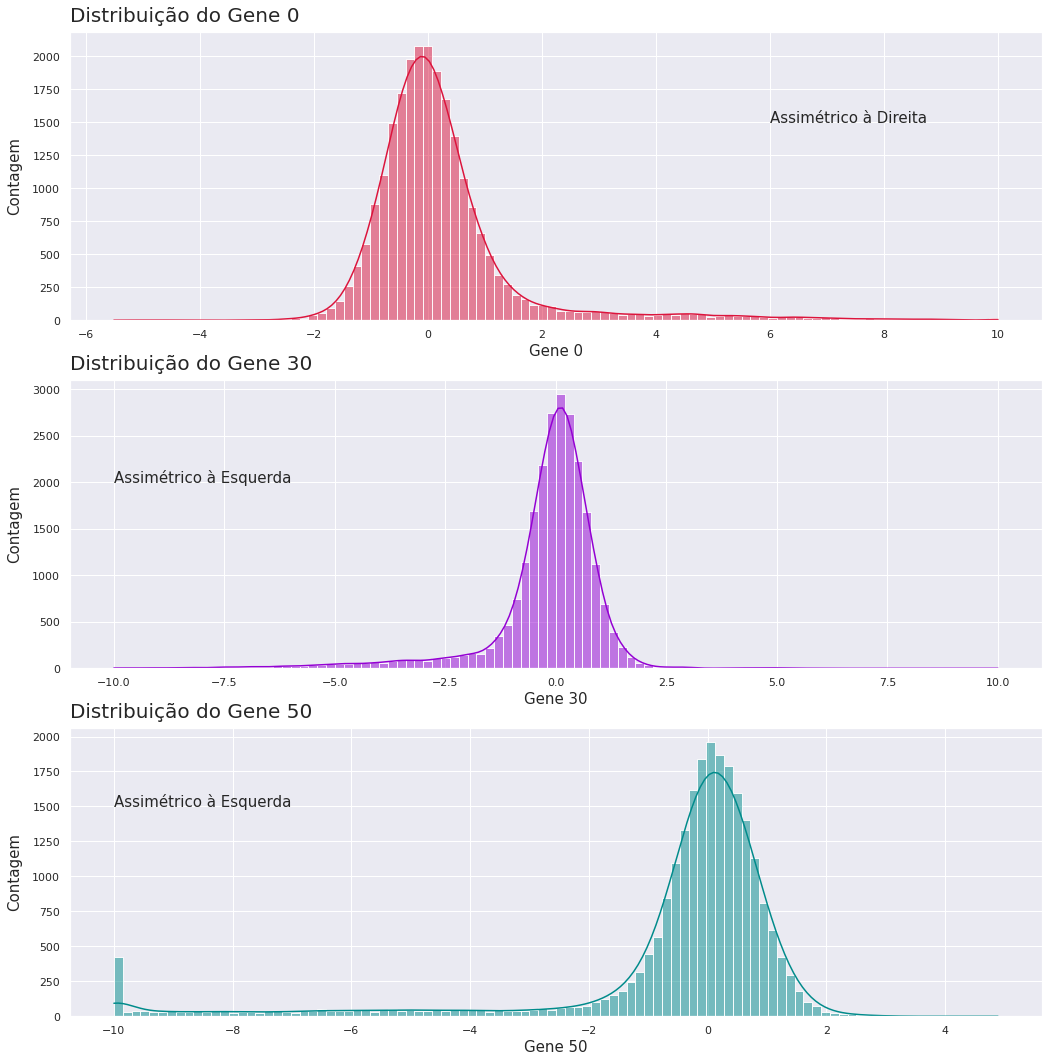

In [112]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 15))

fig.tight_layout(pad=3)

ax1 = sns.histplot(data=dados_experimentos['g0'], bins=100, kde=True, color='crimson', ax=axs[0])
ax1.set_title('Distribuição do Gene 0', fontsize=20, pad=10, loc='left')
ax1.set_xlabel('Gene 0', fontsize=15)
ax1.set_ylabel('Contagem', fontsize=15, labelpad=10)
ax1.annotate('Assimétrico à Direita', xy=(6, 1500), fontsize=15)

ax2 = sns.histplot(data=dados_experimentos['g30'], bins=100, kde=True, color='darkviolet', ax=axs[1])
ax2.set_title('Distribuição do Gene 30', fontsize=20, pad=10, loc='left')
ax2.set_xlabel('Gene 30', fontsize=15)
ax2.set_ylabel('Contagem', fontsize=15, labelpad=10)
ax2.annotate('Assimétrico à Esquerda', xy=(-10, 2000), fontsize=15)

ax3 = sns.histplot(data=dados_experimentos['g50'], bins=100, kde=True, color='darkcyan', ax=axs[2])
ax3.set_title('Distribuição do Gene 50', fontsize=20, pad=10, loc='left')
ax3.set_xlabel('Gene 50', fontsize=15)
ax3.set_ylabel('Contagem', fontsize=15, labelpad=10)
ax3.annotate('Assimétrico à Esquerda', xy=(-10, 1500), fontsize=15)
ax3 = ax3

- Pode ser observado um padrão nos genes;
- Todos possuem sua **moda** (valor que mais aparece) próximo de zero e quase formam uma distribuição **normal**.

### Calculando quantos Genes foram Analisados

In [113]:
dados_experimentos.head(1)

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.062,0.5577,-0.2479,-0.6208,-0.1944,-1.012,-1.022,-0.0326,0.5548,-0.0921,1.183,0.153,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.136,-1.188,0.694,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.301,-0.1537,...,0.4805,0.4965,0.368,0.8427,0.1042,0.1403,0.1758,1.257,-0.5979,1.225,-0.0553,0.7351,0.581,0.959,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.212,0.6362,-0.4427,0.1288,1.484,0.1799,0.5367,-0.1111,-1.012,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176


- Nos dados, temos o id (1), o tratamento (2), o tempo (3), a dose (4) e o composto (5);
- No fim da tabela, temos c99, deduzindo que os c's começam em c0 (assim como nos g's), tem-se 100 colunas de c's;
- O total de colunas da tabela é 877;
- Ou seja, o total de Genes analisados foram **772**

In [114]:
dados_experimentos.loc[:, 'g0':'g771'].describe()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.508900,-0.533900

- Pode-se confirmar os gráficos acima, os genes estão todos próximos de zero

### Plotando a Distribuição das Médias dos Genes

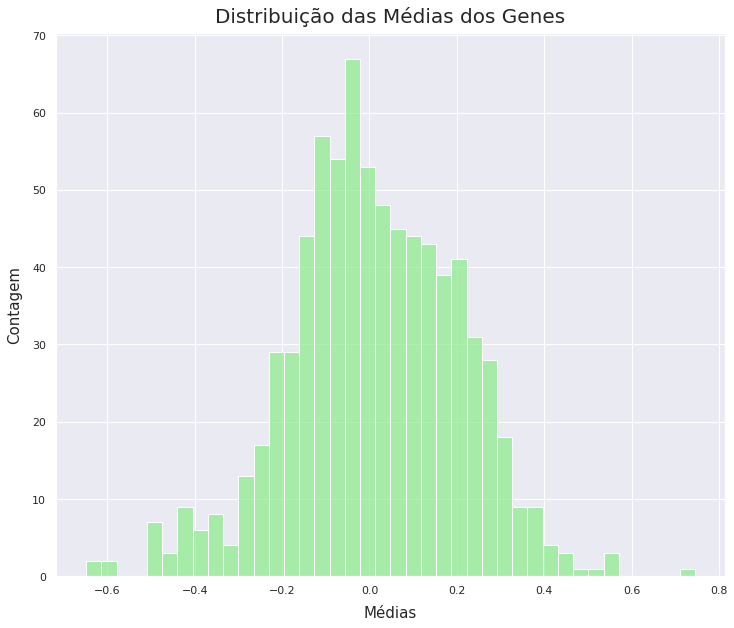

In [115]:
sns.set(rc = {'figure.figsize' : (12, 10)})

dados_medias = dados_experimentos.loc[:, 'g0':'g771'].describe().T['mean']

ax = sns.histplot(data=dados_medias, bins=40, color='lightgreen')
ax.set_title('Distribuição das Médias dos Genes', fontsize=20, pad=10)
ax.set_xlabel('Médias', fontsize=15, labelpad=10)
ax.set_ylabel('Contagem', fontsize=15, labelpad=10)
ax = ax

# Análise dos Tipos Celulares

- Sabe-se que os c's na tabela são os **Tipos Celulares**;
- É comum dizer que uma célula é composta por três partes básicas: membrana plasmática, citoplasma e núcleo;
- **Procariontes** são aquelas que não possuem um núcleo definido envolto por membranas. Já a célula **Eucarionte** apresenta um núcleo delimitado pelo envoltório nuclear, possuindo, portanto, uma proteção ao seu material genético;
- [Link do texto acima](https://brasilescola.uol.com.br/biologia/celula.htm)
- [Link da imagem abaixo](https://cdn.goconqr.com/uploads/media/image/14913439/desktop_6b4c620b-03fa-4ac2-b523-46eb166b4371.png)

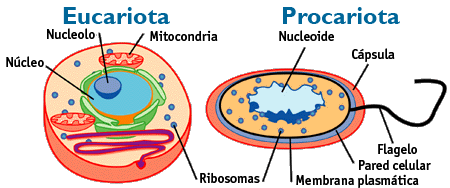

## Visualizando um dos Tipos Celulares

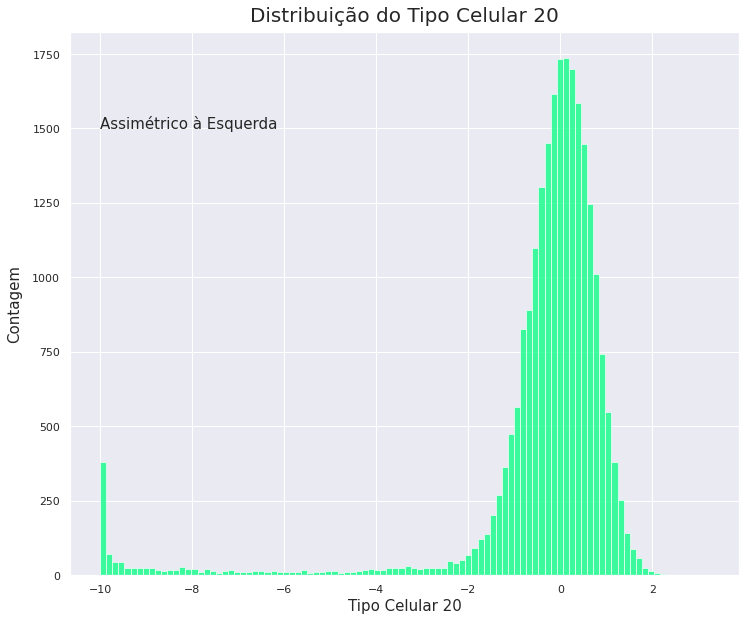

In [116]:
ax = sns.histplot(data=dados_experimentos['c20'], bins=100, color='springgreen')
ax.set_title('Distribuição do Tipo Celular 20', fontsize=20, pad=10, loc='center')
ax.set_xlabel('Tipo Celular 20', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15, labelpad=10)
ax.annotate('Assimétrico à Esquerda', xy=(-10, 1500), fontsize=15)
ax = ax

- Parece que os Tipos Celulares possuem um comportamento parecido com os Genes

### Plotando a Distribuição das Médias dos Tipos Celulares

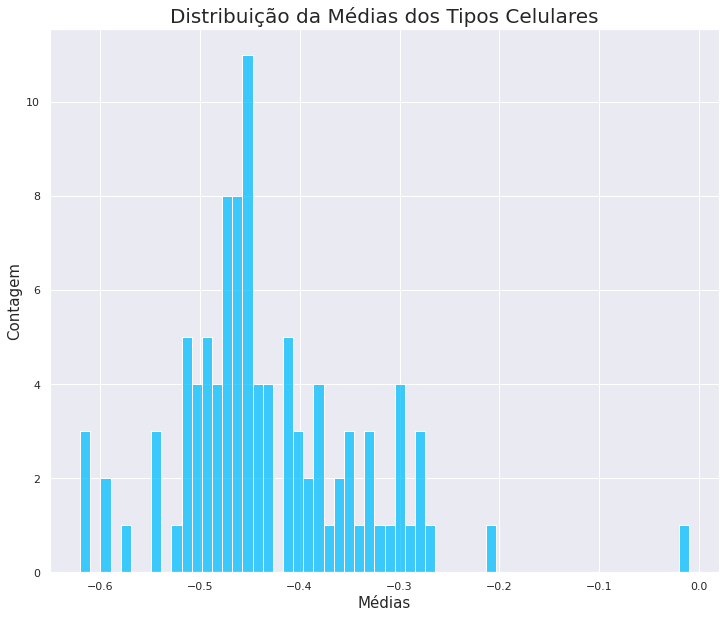

In [117]:
celular_medias = dados_experimentos.loc[:, 'c0':'c99'].describe().T['mean']

ax = sns.histplot(data=celular_medias, bins=60, color='deepskyblue')
ax.set_title('Distribuição da Médias dos Tipos Celulares', fontsize=20)
ax.set_xlabel('Médias', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax = ax

- As médias dos Tipo Celulares são bem diferentes das médias dos Genes

# Análise de Frequências

In [118]:
pd.crosstab(index=[dados_experimentos['dose'], dados_experimentos['tempo']], columns=dados_experimentos['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

- Como pode ser observado, a proporção entre os tratamentos é bem diferente, mas ela se mantém bem similar nos diferentes tempos e doses;
- Todos os valores seguem um padrão, ou seja, os dados não estão "errados"

# Verificando a Influência das Variáveis

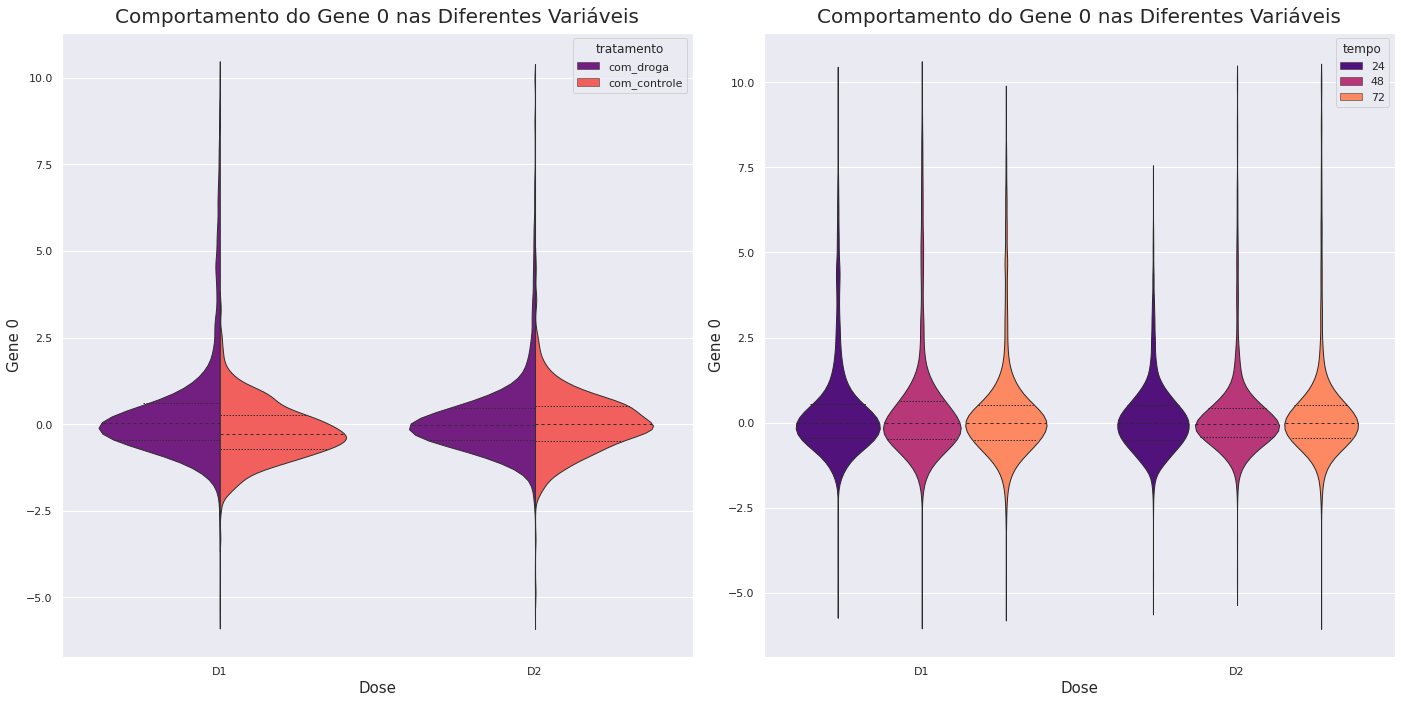

In [119]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
fig.tight_layout(pad=3)
sns.set_theme(style='darkgrid')

ax1 = sns.violinplot(data=dados_experimentos, x='dose', y='g0', hue='tratamento', palette='magma', 
               split=True, inner='quart', linewidth=1, saturation = 1, ax = axs[0])
ax1.set_title('Comportamento do Gene 0 nas Diferentes Variáveis', fontsize=20, pad=10)
ax1.set_xlabel('Dose', fontsize=15)
ax1.set_ylabel('Gene 0', fontsize=15)

ax2 = sns.violinplot(data=dados_experimentos, x='dose', y='g0', hue='tempo', palette='magma', 
                inner='quart', linewidth=1, saturation = 1, ax = axs[1])
ax2.set_title('Comportamento do Gene 0 nas Diferentes Variáveis', fontsize=20, pad=10)
ax2.set_xlabel('Dose', fontsize=15)
ax2.set_ylabel('Gene 0', fontsize=15)
ax2 = ax2

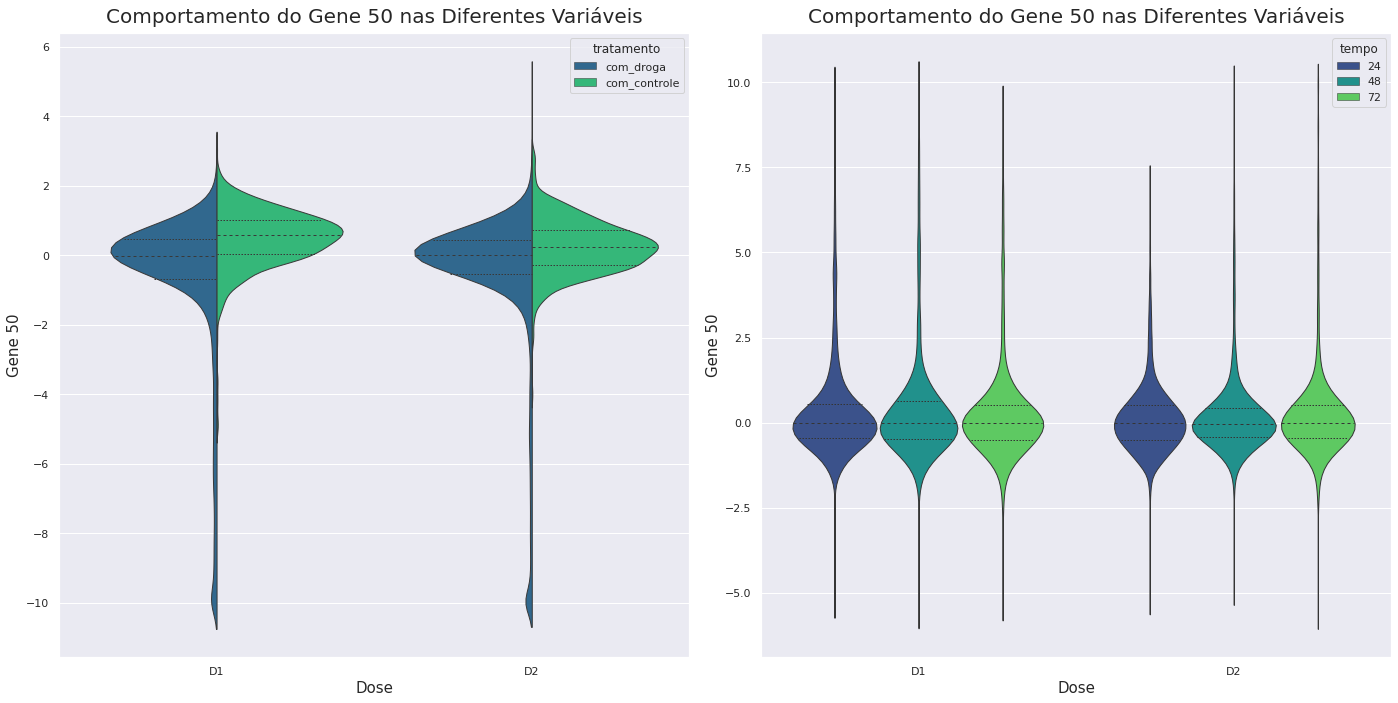

In [120]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
fig.tight_layout(pad=3)
sns.set_theme(style='darkgrid')

ax1 = sns.violinplot(data=dados_experimentos, x='dose', y='g50', hue='tratamento', palette='viridis', 
               split=True, inner='quart', linewidth=1, saturation = 1, ax = axs[0])
ax1.set_title('Comportamento do Gene 50 nas Diferentes Variáveis', fontsize=20, pad=10)
ax1.set_xlabel('Dose', fontsize=15)
ax1.set_ylabel('Gene 50', fontsize=15)

ax2 = sns.violinplot(data=dados_experimentos, x='dose', y='g0', hue='tempo', palette='viridis', 
                inner='quart', linewidth=1, saturation = 1, ax = axs[1])
ax2.set_title('Comportamento do Gene 50 nas Diferentes Variáveis', fontsize=20, pad=10)
ax2.set_xlabel('Dose', fontsize=15)
ax2.set_ylabel('Gene 50', fontsize=15)
ax2 = ax2

- Pelo que pode ser observado, as variáveis "tempo", "tratamento" e "dose" não possuem influências muito distintas nos genes.

## Outro meio de Verificar a influência

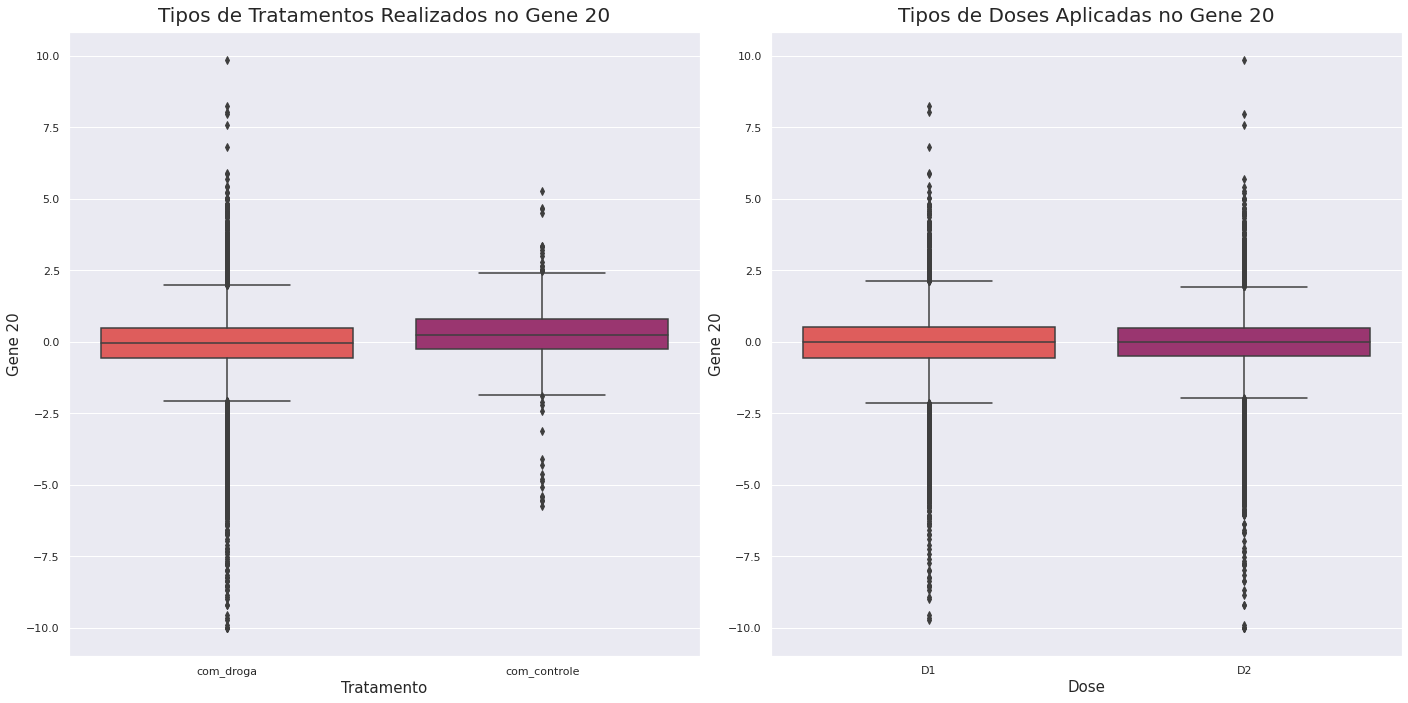

In [121]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
fig.tight_layout(pad=3)
sns.set_theme(style='darkgrid')

ax1 = sns.boxplot(data=dados_experimentos, x='tratamento', y='g20', palette='flare', saturation = 1, ax = axs[0])
ax1.set_title('Tipos de Tratamentos Realizados no Gene 20', fontsize=20, pad=10)
ax1.set_xlabel('Tratamento', fontsize=15)
ax1.set_ylabel('Gene 20', fontsize=15)

ax2 = sns.boxplot(data=dados_experimentos, x='dose', y='g20', palette='flare', saturation = 1, ax = axs[1])
ax2.set_title('Tipos de Doses Aplicadas no Gene 20', fontsize=20, pad=10)
ax2.set_xlabel('Dose', fontsize=15)
ax2.set_ylabel('Gene 20', fontsize=15)
ax2 = ax2

- Pode-se confirmar que a maior parte permanece próximo ao zero

# Correlação

- Verificação de quais variáveis estão associadas;
- Na utilização de Machine Learning, não é bom pegar duas variáveis altamente correlacionadas;
- [Link do Texto Abaixo](https://www.significados.com.br/correlacao/#:~:text=Correla%C3%A7%C3%A3o%20significa%20uma%20semelhan%C3%A7a%20ou,mais%20vari%C3%A1veis%20que%20se%20relacionam.)
-Correlação significa uma semelhança ou relação entre duas coisas, pessoas ou ideias. É uma semelhança ou equivalência que existe entre duas hipóteses, situações ou objetos diferentes;
- No campo da estatística e da matemática, a correlação se refere a uma medida entre duas ou mais variáveis que se relacionam.

In [122]:
corr = dados_experimentos.loc[:, 'g0':'g50'].corr()
corr

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,g41,g42,g43,g44,g45,g46,g47,g48,g49,g50
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,-0.432426,-0.499815,-0.203828,0.021582,-0.023423,-0.119687,0.530238,0.039827,0.238235,0.310583,-0.560201
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,0.000655,-0.110238,0.133896,0.161186,-0.092498,0.031993,0.097674,-0.012420,0.029064,-0.106349,-0.028870
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,-0.080201,-0.109646,-0.121433,-0.086435,0.021241,-0.036105,0.142712,-0.009575,0.039119,0.052003,-0.140002
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,0.114685,-0.047136,-0.010941,-0.168398,-0.001770,0.065444,0.082046,0.297146,0.173796,0.072970,-0.233491
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,-0.309149,-0.373390,0.071462,0.185361,-0.105936,-0.033695,0.355833,-0.060724,0.006138,0.114748,-0.315675
g5,-0.165478,-0.151590,0.018516,0.042231,-0.057449,1.000000,0.083620,0.102345,0.073885,0.126561,0.038743,-0.171709,-0.000393,-0.112423,0.073760,0.037763,0.221227,0.033641,0.041073,0.134431,0.136226,0.042455,0.095901,-0.000709,0.120697,0.082212,0.058257,-0.106304,0.137596,0.171353,0.136856,-0.133521,0.025275,-0.070144,0.058305,-0.108843,-0.034259,0.142193,-0.189048,-0.097622,0.208673,0.206885,0.120727,-0.031065,-0.047988,0.090507,-0.176810,0.023328,0.039471,-0.127953,0.128877
g6,0.238348,-0.122541,0.015190,-0.043177,0.206405,0.083620,1.000000,0.030544,-0.212292,-0.134739,-0.264575,-0.064363,-0.041731,0.110102,-0.126069,-0.107593,-0.109543,-0.182960,-0.058387,0.070343,0.049195,0.244205,-0.076039,-0.063008,0.034160,-0.002408,-0.194962,-0.051850,-0.032510,0.091318,-0.113642,0.179365,0.065968,-0.059884,-0.114453,0.102340,0.106371,-0.038967,0.045983,0.073990,-0.040374,-0.006081,-0.170005,0.137326,0.053565,-0.003568,0.094446,-0.045317,-0.074863,0.104435,0.026171
g7,-0.374451,0.144537,-0.144205,-0.175692,-0.032748,0.102345,0.030544,1.000000,0.278085,0.288780,0.382325,-0.184966,0.166101,-0.380687,0.266334,0.141999,0.372104,0.185269,-0.061020,0.121534,0.231938,0.321506,-0.043685,0.143473,0.458273,0.123891,0.262002,-0.126174,0.287440,0.222967,0.419395,-0.453566,0.492635,-0.036159,0.014755,-0.199236,0.313535,0.584749,-0.579429,-0.39801

- Visto nas aulas: 
  - Valores muito próximos de 1 ou -1: variáveis altamente correlacionadas;
  - Valores muito próximos de 0: variáveis pouco ou não correlacionadas;
  - Valores muito próximos de 1: variáveis proporcionalmente correlacionadas;
  - Valores muito próximos de -1: variáveis correlacionadas inversamente proporcionais.

- É de se esperar que as variáveis iguais sejam altamente e proporcionalmente correlacionadas (1)

## Visualização da Correlação

### Importando o numpy

In [123]:
import numpy as np

In [124]:
np.ones_like(corr)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [125]:
np.triu(np.ones_like(corr, dtype=bool), k = 1)

array([[False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

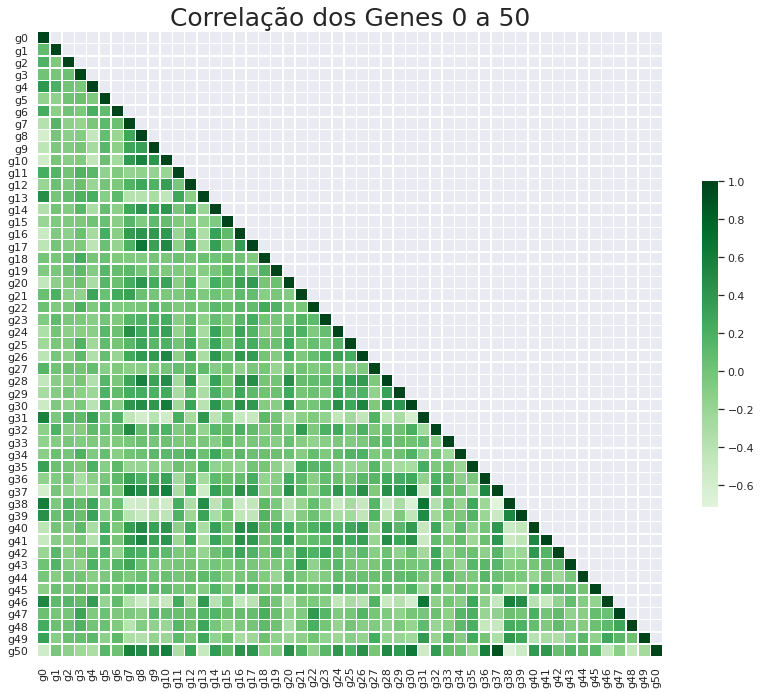

In [126]:
mascara = np.triu(np.ones_like(corr, dtype=bool), k = 1)

f, ax = plt.subplots(figsize=(14, 12))

ax = sns.heatmap(data=corr, mask=mascara, cmap='Greens', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlação dos Genes 0 a 50', fontsize=25)
ax = ax

- No geral, são bem poucos os genes que possuem uma alta correlação.

## Correlação dos Tipos Celulares

In [127]:
corr_cel = dados_experimentos.loc[:, 'c0':'c50'].corr()
corr_cel

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50
c0,1.000000,0.827336,0.848472,0.798830,0.840695,0.844469,0.811946,0.793171,0.842977,0.759971,0.850533,0.832837,0.808033,0.836838,0.823716,0.827496,0.788947,0.831436,0.797051,0.796719,0.818420,0.823586,0.717807,0.805687,0.836447,0.837448,0.815484,0.840909,0.824231,0.807981,0.818558,0.855363,0.831066,0.820803,0.828947,0.829693,0.839386,0.774960,0.806885,0.849807,0.847857,0.848941,0.847747,0.827377,0.847072,0.824247,0.816332,0.819386,0.778280,0.792811,0.797689
c1,0.827336,1.000000,0.901416,0.808364,0.879258,0.869569,0.876924,0.793199,0.879892,0.812345,0.866297,0.884532,0.861089,0.880177,0.820911,0.857797,0.771984,0.843076,0.861134,0.820399,0.837626,0.852621,0.756086,0.812062,0.874647,0.829208,0.887230,0.853246,0.861559,0.789314,0.816042,0.889619,0.837788,0.866130,0.865169,0.840517,0.877007,0.779697,0.890506,0.835689,0.891745,0.870896,0.891842,0.869508,0.851121,0.858537,0.828145,0.854667,0.853745,0.845159,0.839386
c2,0.848472,0.901416,1.000000,0.830759,0.909991,0.882794,0.898819,0.812980,0.896087,0.821522,0.892033,0.904968,0.879638,0.910497,0.841421,0.884464,0.800587,0.879281,0.881011,0.824149,0.853648,0.878793,0.761439,0.832908,0.887800,0.859023,0.899897,0.879307,0.876141,0.824171,0.851934,0.906052,0.850681,0.890263,0.880173,0.852595,0.887820,0.799599,0.905449,0.866557,0.909829,0.889876,0.909086,0.886977,0.880717,0.875814,0.854217,0.874174,0.863002,0.853704,0.848724
c3,0.798830,0.808364,0.830759,1.000000,0.831523,0.829550,0.805506,0.752940,0.830369,0.765626,0.818465,0.828218,0.803839,0.822104,0.788432,0.818493,0.758345,0.804018,0.806834,0.781198,0.791121,0.816744,0.742109,0.792355,0.828853,0.829277,0.807726,0.816247,0.818892,0.790481,0.796522,0.830602,0.796222,0.804081,0.811296,0.805880,0.820989,0.747433,0.813351,0.827805,0.833075,0.821351,0.838118,0.821934,0.813087,0.806219,0.808859,0.812784,0.804207,0.818632,0.821138
c4,0.840695,0.879258,0.909991,0.831523,1.000000,0.883526,0.893285,0.808096,0.888384,0.822614,0.890057,0.904082,0.870384,0.911130,0.839991,0.879147,0.779366,0.879616,0.893702,0.807685,0.833680,0.885335,0.768383,0.854108,0.872477,0.872339,0.900002,0.869316,0.875701,0.808720,0.851560,0.901149,0.836846,0.891190,0.865017,0.851393,0.887747,0.792168,0.900725,0.870204,0.904528,0.880368,0.913242,0.875934,0.878659,0.869324,0.862019,0.862095,0.862338,0.855029,0.851843
c5,0.844469,0.869569,0.882794,0.829550,0.883526,1.000000,0.863932,0.794140,0.875615,0.810827,0.874461,0.883338,0.852764,0.877659,0.824086,0.865703,0.773152,0.843611,0.870892,0.819537,0.835350,0.866518,0.798246,0.833151,0.871687,0.866063,0.878555,0.854136,0.862635,0.803969,0.831032,0.874491,0.827969,0.858202,0.868679,0.842427,0.879457,0.766335,0.872094,0.862231,0.886947,0.880703,0.897040,0.876421,0.860547,0.855910,0.841310,0.862328,0.861956,0.851853,0.864223
c6,0.811946,0.876924,0.898819,0.805506,0.893285,0.863932,1.000000,0.796485,0.873232,0.839685,0.884135,0.887255,0.867589,0.900492,0.839245,0.875685,0.768282,0.880802,0.895716,0.800826,0.850150,0.871791,0.752278,0.826409,0.876337,0.839224,0.897879,0.864267,0.878512,0.790123,0.859702,0.893770,0.821142,0.914730,0.868987,0.839136,0.857850,0.766112,0.910617,0.844998,0.898693,0.895083,0.908299,0.860556,0.874571,0.873974,0.828976,0.863283,0.857008,0.847009,0.825720
c7,0.793171,0.793199,0.812980,0.752940,0.808096,0.794140,0.796485,1.000000,0.812357,0.728066,0.833612,0.810875,0.799748,0.821206,0.803563,0.820307,0.748862,0.817198,0.769116,0.779457,0.803508,0.787533,0.690031,0.773441,0.799476,0.790698,0.793321,0.816966,0.778022,0.775747,0.806346,0.824469,0.811058,0.829506,0.807257,0.803313,0.791785,0.735452,0.797602,0.810038,0.811687,0.817912,0.832790,0.783834,0.838290,0.811981,0.779971,0.799859,0.766085,0.766224,0.760949
c8,0.842977,0.879892,0.896087,0.830369,0.888384,0.875615,0.873232,0.812357,1.000000,0.827942,0.884254,0.88433

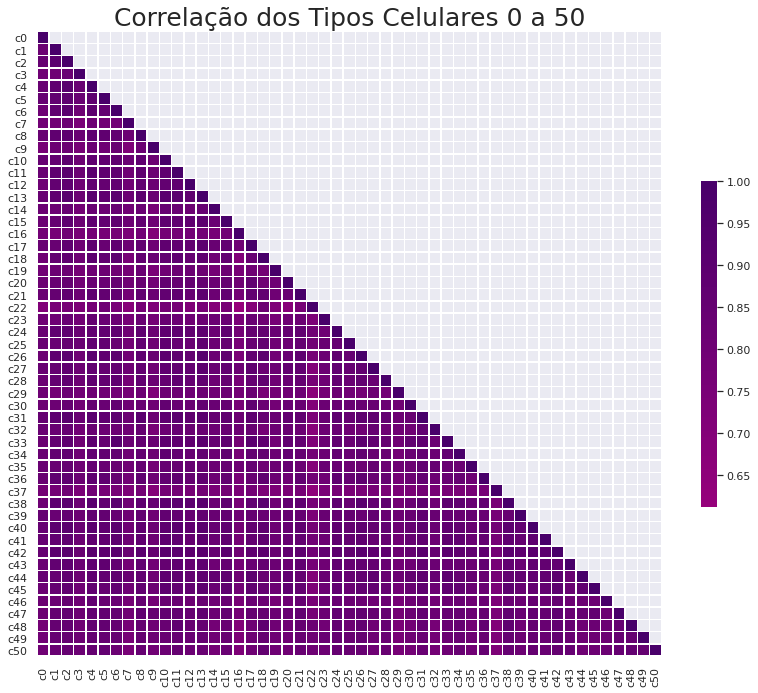

In [128]:
mascara = np.triu(np.ones_like(corr_cel, dtype=bool), k = 1)

f, ax = plt.subplots(figsize=(14, 12))

ax = sns.heatmap(data=corr_cel, mask=mascara, cmap='RdPu', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlação dos Tipos Celulares 0 a 50', fontsize=25)
ax = ax

- Grande parte dos Tipos Celulares possuem alta correlação entre si.

- [Link do Texto Abaixo](http://sisne.org/Disciplinas/Grad/ProbEstat2/aula13.pdf)
- Baseado na medida de correlação entre duas variáveis, pode-se ter uma ideia sobre se o conhecimento de valores de uma das variáveis permite a previsão de valores da outra variável.

## Correlação entre os Genes e Tipos Celulares

- Correlação de 25 genes com 25 tipos celulares.

In [129]:
gene_25 = dados_experimentos.loc[:,'g0':'g24']
celulares_25 = dados_experimentos.loc[:,'c0':'c24']

In [130]:
df_gc = pd.concat([gene_25, celulares_25], axis=1)
df_gc.head()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,-0.0600,0.1083,0.6864,0.4043,0.4213,-0.6797,0.2888,0.4323,-0.3381,0.3407,0.9084,0.6857,1.0620,0.7602,-0.1048,0.3594,0.6376,-0.2798,-0.4010,0.6842,1.1560,0.3522,-0.3971,-0.2115,-0.2687
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,0.0927,0.2723,0.2772,0.7776,0.3679,0.5696,0.2835,1.4080,0.3745,0.6775,0.7787,0.2074,1.1110,0.2433,0.2010,0.7094,-0.4210,-0.2274,0.4045,0.1138,0.9950,0.0087,0.4864,-0.0140,0.0164
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,-0.1312,-1.4640,0.3394,-1.7790,0.2188,0.5826,-0.7513,0.0543,0.7182,-0.4159,0.3084,-0.0899,-0.0397,-0.5077,-0.5072,0.0100,-0.6915,0.0643,-0.8927,-0.2048,0.0773,0.5971,-0.1602,-0.2028,-0.2216
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.3998,-4.5520,-2.7350,-1.9630,-2.8610,-1.2670,-2.5830,-0.5036,-3.1590,-1.8510,-2.2730,-4.6920,-1.2750,-1.4970,-0.0156,-1.9350,-1.3430,-0.5252,-2.7210,-0.2524,0.9197,-3.1220,-1.9180,-0.6761,-2.8360
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,-0.3774,0.7364,-0.1659,0.2341,1.0060,0.3204,-0.0852,-0.2284,-0.2533,-0.3174,0.9642,-0.0853,0.1559,0.1419,0.1197,0.6774,0.1332,-0.5176,0.1232,0.0827,0.6995,0.5953,1.0600,-0.4255,0.8624


In [131]:
corr_gc = df_gc.corr()

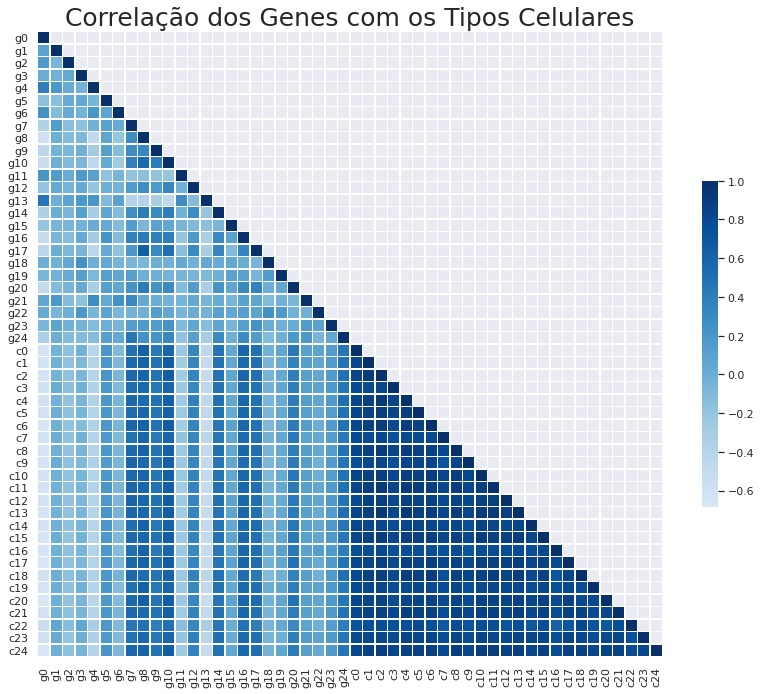

In [132]:
mascara = np.triu(np.ones_like(corr_gc, dtype=bool), k = 1)

f, ax = plt.subplots(figsize=(14, 12))

ax = sns.heatmap(data=corr_gc, mask=mascara, cmap='Blues', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlação dos Genes com os Tipos Celulares', fontsize=25)
ax = ax

- Pode-se observar uma alta correlação entre certos genes e todos os tipos celulares

# Tratamento do Texto Categórico "tratamento"

- Dois modos de se tratar o texto categórico:
  - Utilizando o pandas get_dummies;
  - Utilizando o OneHotEncoder do sklearn.

### Importando o sklearn

In [133]:
from sklearn import preprocessing

## Utilizando o "OneHotEncoder"

In [134]:
ohe = preprocessing.OneHotEncoder(handle_unknown='ignore', sparse=False)  # sparse=False retorna um Array
ohe.fit(dados_experimentos[['tratamento']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [135]:
ohe.get_feature_names(['tratamento'])

array(['tratamento_com_controle', 'tratamento_com_droga'], dtype=object)

In [136]:
X = ohe.transform(dados_experimentos[['tratamento']])
dados_numericos = pd.DataFrame(X, columns = ohe.get_feature_names(['tratamento']))
dados_numericos.head()

,tratamento_com_controle,tratamento_com_droga
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


- Se foi tratado com droga, tem o valor 1, se não foi, tem o valor 0

## Deletando a Coluna Original "tratamento"

In [137]:
dados_experimentos = dados_experimentos.drop(['tratamento'], axis=1)
dados_experimentos.head(2)

,id,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.183,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.152,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371


## Concatenando os DataFrames

In [138]:
dados_experimentos = pd.concat([dados_experimentos, dados_numericos], axis=1)
dados_experimentos.head(2)

,id,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,tratamento_com_controle,tratamento_com_droga
0,id_000644bb2,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.183,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0.0,1.0
1,id_000779bfc,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.152,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0.0,1.0


# Tratamento do Texto Categórico "tempo"

## Utilizando o get_dummies

In [139]:
dados_numericos = pd.get_dummies(dados_experimentos['tempo'])
dados_numericos.head()

,24,48,72
0,1,0,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


## Deletando a Coluna Original "tempo"

In [140]:
dados_experimentos = dados_experimentos.drop(['tempo'], axis=1)

## Concatenando os DataFrames

In [141]:
dados_experimentos = pd.concat([dados_experimentos, dados_numericos], axis=1)
dados_experimentos.head(2)

,id,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,...,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,tratamento_com_controle,tratamento_com_droga,24,48,72
0,id_000644bb2,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.183,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,...,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0.0,1.0,1,0,0
1,id_000779bfc,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.152,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,...,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0.0,1.0,0,0,1


# Tratamento do Texto Categórico "dose"

## Utilizando o "get_dummies"

In [142]:
dados_numericos = pd.get_dummies(dados_experimentos['dose'])
dados_numericos.head()

,D1,D2
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


## Deletando a Coluna Original "dose"

In [143]:
dados_experimentos = dados_experimentos.drop(['dose'], axis=1)

## Concatenando os DataFrames

In [144]:
dados_experimentos = pd.concat([dados_experimentos, dados_numericos], axis=1)
dados_experimentos.head(2)

,id,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,...,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,tratamento_com_controle,tratamento_com_droga,24,48,72,D1,D2
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.183,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,...,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0.0,1.0,1,0,0,1,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.152,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,...,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0.0,1.0,0,0,1,1,0


- A coluna "composto" não será tratada, pois devido a quantidade de valores, o preço que pagaríamos seria muito alto (teríamos uma quantidade enorme de colunas e isso faz com que o tratamento não valha a pena).

# Importando os Dados de Resultados pelo Github

In [145]:
url_resultados = 'https://github.com/Mathvivas/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true'

dados_resultados = pd.read_csv(url_resultados)

In [146]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- A tabela de resultados possui uma coluna chamada "id". Esse id é a **chave primária** da tabela de experimentos, ou seja, as tabelas estão "conectadas" por esse id;
- As outras colunas representam os **mecanismos de ação** dos compostos (o que o composto causou no alvo (enzima, proteína, ...)).

# Explorando os Dados de Resultado

In [147]:
print(f'Os resultados possuem {dados_resultados.shape[0]} linhas e {dados_resultados.shape[1]} colunas')

Os resultados possuem 23814 linhas e 207 colunas


In [148]:
dados_resultados['acat_inhibitor'].unique()

array([0, 1])

- Os dados só possuem dois valores (0 ou 1), ou seja, são valores categóricos

In [149]:
print(f'Os resultados possuem {dados_resultados.isna().sum().sum()} valores nulos')

Os resultados possuem 0 valores nulos


In [150]:
dados_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


- Os resultados possuem 206 valores inteiros e 1 objeto (string)

## Separando os Sufixos

In [151]:
colunas = dados_resultados.columns[1:]  # Não pega o id
colunas

Index(['5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
       'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
       'adenylyl_cyclase_activator', 'adrenergic_receptor_agonist',
       ...
       'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist',
       'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor',
       'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b',
       'vitamin_d_receptor_agonist', 'wnt_inhibitor'],
      dtype='object', length=206)

In [152]:
colunas[0].split('_')[-1]   # Pega o último da lista formada pelo split

'inhibitor'

In [153]:
i = 0
sufixos = []
for i in range(len(colunas)):
  sufixos.append(colunas[i].split('_')[-1])

len(sufixos)

206

## Pegando os valores únicos da lista

- Transformar a lista em um conjunto (set);
- "set" não aceita valores duplicados;
- Percebi que não será necessário, pois existe uma função na collections do Python chamada Counter que restorna um dicionário.

## Contando o número de categorias que existem na tabela

In [154]:
from collections import Counter

In [155]:
categorias_e_aparicoes = Counter(sufixos)
categorias_e_aparicoes

Counter({'activator': 5,
         'agent': 3,
         'agonist': 28,
         'analgesic': 1,
         'antagonist': 32,
         'anti-inflammatory': 1,
         'antiarrhythmic': 1,
         'antibiotic': 1,
         'anticonvulsant': 1,
         'antifolate': 1,
         'antifungal': 1,
         'antihistamine': 1,
         'antimalarial': 1,
         'antioxidant': 1,
         'antiprotozoal': 1,
         'antiviral': 1,
         'b': 1,
         'blocker': 2,
         'diuretic': 1,
         'donor': 1,
         'immunosuppressant': 1,
         'inhibitor': 112,
         'laxative': 1,
         'local': 1,
         'medium': 1,
         'scavenger': 1,
         'secretagogue': 1,
         'sensitizer': 1,
         'steroid': 1,
         'stimulant': 1})

- Observa-se que o "inhibitor" é a ação que mais ocorre nos experimentos.

## Visualização das Top 6 Categorias

In [156]:
top6_categorias = dict(sorted(categorias_e_aparicoes.items(), key = lambda kv : kv[1])[24:])
top6_categorias

{'activator': 5,
 'agent': 3,
 'agonist': 28,
 'antagonist': 32,
 'blocker': 2,
 'inhibitor': 112}

In [157]:
top6_categorias = pd.DataFrame(data = top6_categorias, index = [0])
top6_categorias

,blocker,agent,activator,agonist,antagonist,inhibitor
0,2,3,5,28,32,112


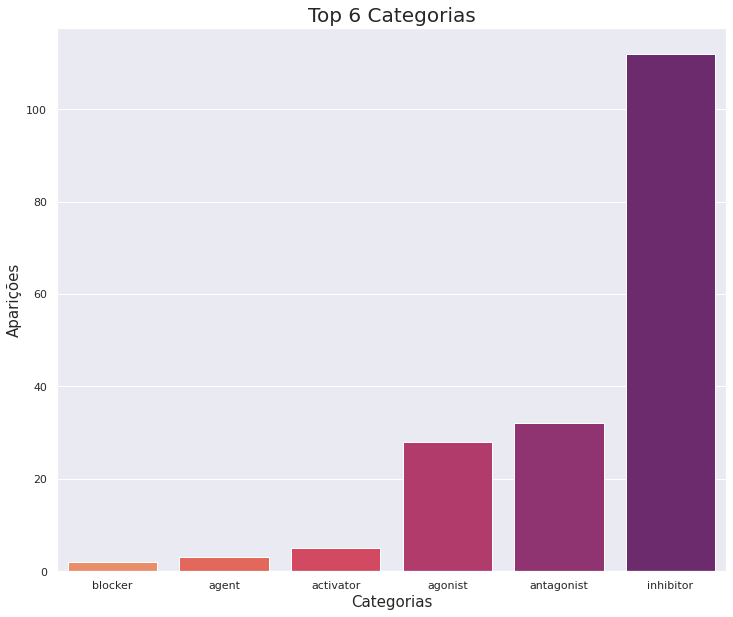

In [158]:
ax = sns.barplot(data = top6_categorias, palette = 'flare', saturation=1)
ax.set_title('Top 6 Categorias', fontsize=20)
ax.set_xlabel('Categorias', fontsize=15)
ax.set_ylabel('Aparições', fontsize=15)
ax = ax

## Contagem de Quantas Ativações cada Ação teve

In [159]:
# ativacoes = dados_resultados.select_dtypes('int64').sum().sort_values(ascending=False)
ativacoes = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
ativacoes

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

- Da mesma forma que a categoria "inhibitor" é a que mais ocorre, os inibidores foram os que mais obtiveram resultados positivos.

## Verificação de Quantas Vezes uma Droga Ativou

- **Somente os tratamentos com droga ativam**;
- Caso o valor seja zero, ou é tratamento com controle, ou a droga não ativou.

In [160]:
numero_ativacoes = dados_resultados.drop('id', axis=1).sum(axis=1).to_frame()
numero_ativacoes

,0
0,1
1,0
2,3
3,0
4,1
...,...
23809,1
23810,1
23811,0
23812,1


In [161]:
dados_resultados['numero_ativacoes'] = numero_ativacoes

In [162]:
dados_resultados.head(3)

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,numero_ativacoes
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


## Verificação Booleana das Ativações

- As linhas diferentes de zero resultarão em True.

In [163]:
numero_ativacoes != 0

,0
0,True
1,False
2,True
3,False
4,True
...,...
23809,True
23810,True
23811,False
23812,True


In [164]:
dados_resultados['ativou'] = numero_ativacoes != 0
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,numero_ativacoes,ativou
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


- Tudo que é necessário para análise já está tratado. Agora, é preciso observar os dados dos experimentos e resultados juntos

# Junção dos Dados dos Experimentos e dos Resultados

- Junção das Tabelas através da chave primária (id) em comum.

In [165]:
dados = pd.merge(dados_experimentos, dados_resultados[['id', 'numero_ativacoes', 'ativou']], on = 'id')
dados.head()

,id,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,...,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,tratamento_com_controle,tratamento_com_droga,24,48,72,D1,D2,numero_ativacoes,ativou
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,...,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0.0,1.0,1,0,0,1,0,1,True
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,...,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0.0,1.0,0,0,1,1,0,0,False
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,...,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0.0,1.0,0,1,0,1,0,3,True
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,...,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0.0,1.0,0,1,0,1,0,0,False
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,...,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0.0,1.0,0,0,1,0,1,1,True


# Análise dos Dados em Conjunto

### Quais tratamentos ativaram?

In [166]:
dados.query('tratamento_com_controle == 1')['ativou'].value_counts()

False    1866
Name: ativou, dtype: int64

- Comprovado que os tratamentos com controle não ativam.

In [167]:
dados.query('tratamento_com_droga == 1')['ativou'].value_counts()

True     14447
False     7501
Name: ativou, dtype: int64

- O tratamento com droga obteve praticamente o dobro de ativações do que falhas.

## Analisando Novamente os 6 Compostos mais Utilizados

In [168]:
top6_compostos = dados['composto'].value_counts().index[:6]
top6_compostos

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee',
       'd08af5d4b'],
      dtype='object')

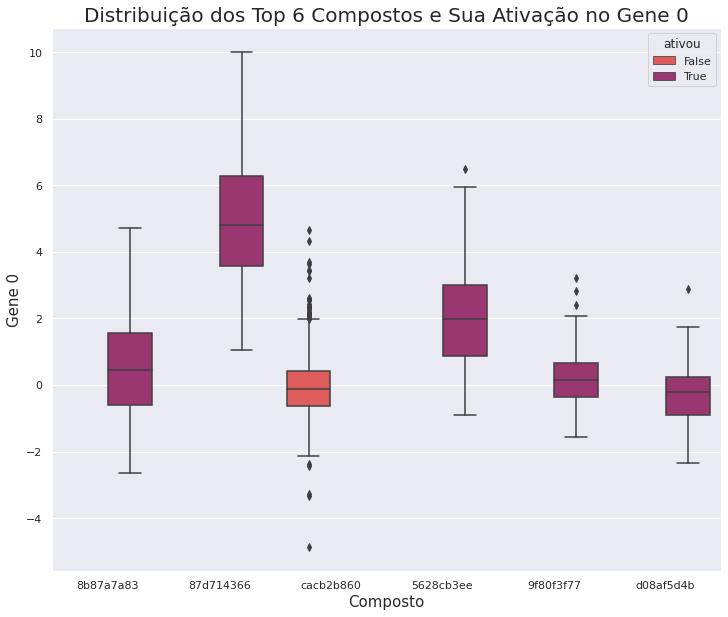

In [169]:
ax = sns.boxplot(data = dados.query('composto in @top6_compostos'), x = 'composto', y = 'g0', 
                 hue='ativou', palette='flare', saturation=1)
ax.set_title('Distribuição dos Top 6 Compostos e Sua Ativação no Gene 0', fontsize=20)
ax.set_xlabel('Composto', fontsize=15)
ax.set_ylabel('Gene 0', fontsize=15)
ax = ax

- Parece que o composto cacb2b860 não causou expressões significativas, mas possui muitos **"outliers"** que expressão grandes diferenças;
- O Composto 87d714366 possui um comportamento muito diferente dos demais. Pelo que pode ser observado, ele foi o que mais ativou o Gene 0, será que se mantém para todos os genes?

## Verificando se os Compostos se mantém em outros Genes

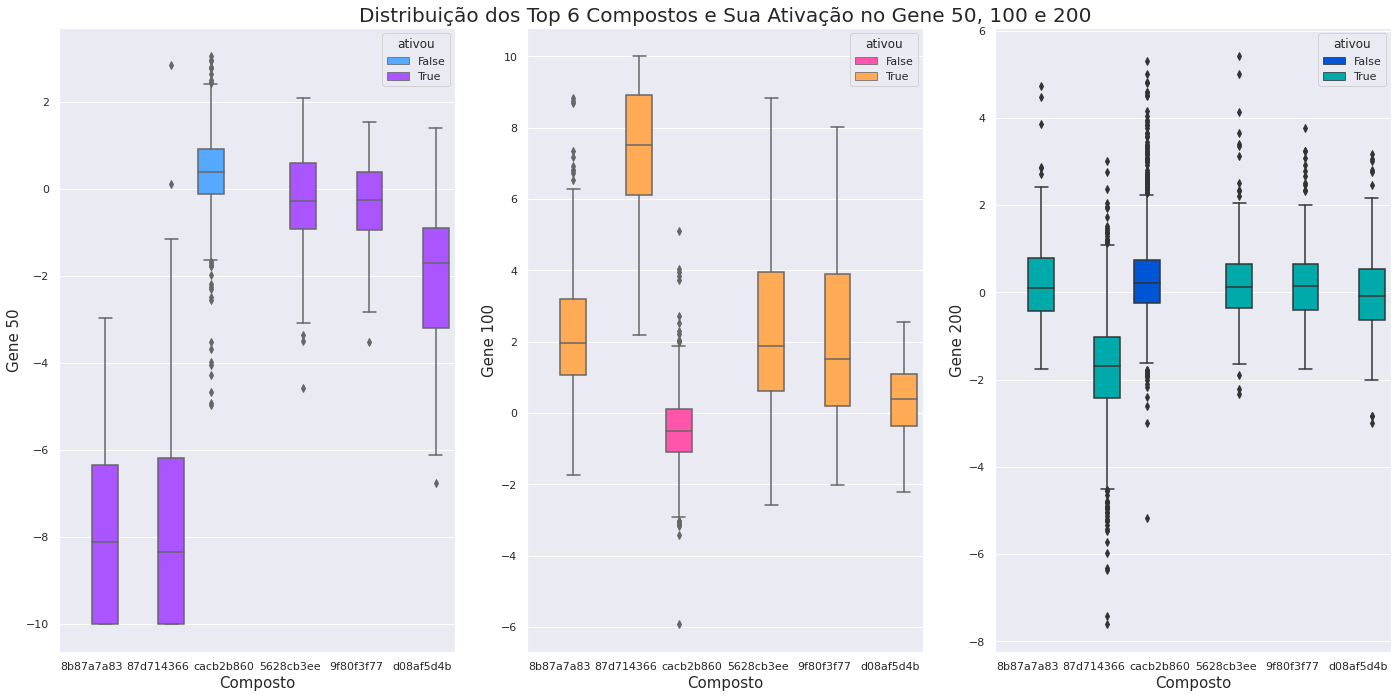

In [170]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))
fig.tight_layout(pad=3)
sns.set_theme(style='darkgrid')

ax1 = sns.boxplot(data = dados.query('composto in @top6_compostos'), x = 'composto', y = 'g50',
                 hue='ativou', palette='cool', saturation=1, ax = axs[0])
ax1.set_xlabel('Composto', fontsize=15)
ax1.set_ylabel('Gene 50', fontsize=15)

ax2 = sns.boxplot(data = dados.query('composto in @top6_compostos'), x = 'composto', y = 'g100',
                 hue='ativou', palette='spring', saturation=1, ax = axs[1])
ax2.set_title('Distribuição dos Top 6 Compostos e Sua Ativação no Gene 50, 100 e 200', fontsize=20)
ax2.set_xlabel('Composto', fontsize=15)
ax2.set_ylabel('Gene 100', fontsize=15)

ax3 = sns.boxplot(data = dados.query('composto in @top6_compostos'), x = 'composto', y = 'g200',
                 hue='ativou', palette='winter', saturation=1, ax = axs[2])
ax3.set_xlabel('Composto', fontsize=15)
ax3.set_ylabel('Gene 200', fontsize=15)

ax3 = ax3

- Aparentemente, o composto 87d714366 é o que causa a maior expressão nos Genes.

## Analisando as Ativações dos Compostos

In [171]:
atv = dados.query('composto == "87d714366"')['numero_ativacoes'].sum()
print(f'O composto 87d71466 obteve {atv} ativações')

O composto 87d71466 obteve 1436 ativações


In [172]:
atv = dados.query('composto == "8b87a7a83"')['numero_ativacoes'].sum()
print(f'O composto 8b87a7a83 obteve {atv} ativações')

O composto 8b87a7a83 obteve 203 ativações


In [173]:
atv = dados.query('composto == "5628cb3ee"')['numero_ativacoes'].sum()
print(f'O composto 5628cb3ee obteve {atv} ativações')

O composto 5628cb3ee obteve 202 ativações


# Trabalhando com Modelos de Machine Learning

## Separando os Dados em Treino e Teste

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
dados.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('uint8'), dtype('int64'),
       dtype('bool')], dtype=object)

In [176]:
x = dados.select_dtypes('float64')
y = dados['ativou']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 500)

- É necessário tomar um certo cuidado durante o treino, pois a máquina pode ficar muito "acostumada", "viciada" com os dados de treino, causando o que é chamado de **overfitting**, ou seja, a máquina "aprende" somente os dados de treino e possui um desempenho pior no teste.

## Demonstrando o Overfitting

In [177]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
teste = []
treino = []
for i in range(1, 10):
  arvore = DecisionTreeClassifier(max_depth=i)
  arvore.fit(x_treino, y_treino)
  teste.append(arvore.score(x_teste, y_teste))
  treino.append(arvore.score(x_treino, y_treino))

In [179]:
teste

[0.6857022884736511,
 0.6857022884736511,
 0.6892714675624606,
 0.6882217090069284,
 0.6922107915179508,
 0.6901112744068865,
 0.68990132269578,
 0.6886416124291413,
 0.6844425782070124]

In [180]:
treino

[0.6848459398456774,
 0.6848459398456774,
 0.6892551572095953,
 0.6917222193060731,
 0.69445173481707,
 0.6953440764264343,
 0.6989134428638917,
 0.7014329956432733,
 0.7054747782268648]

- Como pode ser observado, os dados de treino melhoraram, mas os de teste pioraram

Text(0.5, 0, 'Profundidade da Árvore')

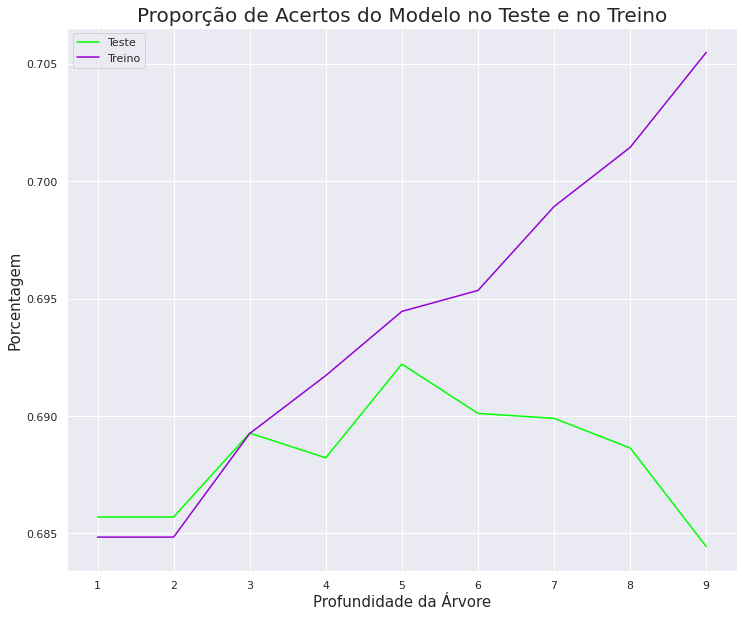

In [181]:
sns.lineplot(x = range(1, 10), y = teste, label = 'Teste', color = 'lime')
sns.lineplot(x = range(1, 10), y = treino, label = 'Treino', color = 'darkviolet')
plt.title('Proporção de Acertos do Modelo no Teste e no Treino', fontsize=20)
plt.ylabel('Porcentagem', fontsize=15)
plt.xlabel('Profundidade da Árvore', fontsize=15)

## Árvore de Decisão

In [182]:
arvore = DecisionTreeClassifier(max_depth = 5, random_state = 500)
arvore.fit(x_treino, y_treino)
arvore.score(x_teste, y_teste)

0.6920008398068445

- Este número significa que o modelo acertou 69% dos dados de teste.

## DummyClassifier

In [183]:
from sklearn.dummy import DummyClassifier

In [184]:
dummy = DummyClassifier(strategy = 'most_frequent')

In [185]:
dummy.fit(x_treino, y_treino)

dummy.score(x_teste, y_teste)

0.6078102036531597

- O modelo da árvore possui um resultado melhor

## ExtraTreeClassifier

In [186]:
from sklearn.tree import ExtraTreeClassifier

In [187]:
extra_tree = ExtraTreeClassifier(max_depth=10, random_state=500)

In [188]:
extra_tree.fit(x_treino, y_treino)

extra_tree.score(x_teste, y_teste)

0.6468612219189587

In [189]:
from sklearn.ensemble import GradientBoostingClassifier

In [190]:
gra = GradientBoostingClassifier(n_estimators=4, learning_rate=0.5, max_depth=3, random_state=500)

In [191]:
gra.fit(x_treino, y_treino)

gra.score(x_teste, y_teste)

0.691790888095738

- GradientBoostingClassifier chegou perto, mas a árvore de decisão continua acima.

- Talvez sejam necessários mais dados para chegar a um número melhor;
- Até agora, só foram utilizados os valores float da tabela, talvez, se fossem utilizados os inteiros também, pode ser que o resultado melhore.

In [192]:
x = dados.select_dtypes(['float64', 'uint8'])
y = dados['ativou']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 500)

In [193]:
arvore = DecisionTreeClassifier(max_depth = 5, random_state = 500)
arvore.fit(x_treino, y_treino)
arvore.score(x_teste, y_teste)

0.6915809363846316

In [194]:
gra.fit(x_treino, y_treino)
gra.score(x_teste, y_teste)

0.691790888095738

- Não houve muita diferença, os valores inteiros não são o suficiente para melhorar o modelo;

- Ao que se pode observar, os dados não são o suficiente para que se obtenha um bom modelo de Machine Learning.